### **Tecnológico de Monterrey**

#### **Maestría en Inteligencia Artificial Aplicada**
#### **Clase**: Operaciones de Aprendizaje Automático
#### **Docentes**: Dr. Gerardo Rodríguez Hernández | Mtro. Ricardo Valdez Hernández | Mtro. Carlos Alberto Vences Sánchez

##### **Actividad**: Proyecto: Avance (Fase 1) **Notebook**: EDA
##### **Equipo 25**:
| Nombre | Matrícula |
|--------|-----------|
| Rafael Becerra García | A01796211 |
| Andrea Xcaret Gómez Alfaro | A01796384 |
| David Hernández Castellanos | A01795964 |
| Juan Pablo López Sánchez | A01313663 |
| Osiris Xcaret Saavedra Solís | A01795992 |

### Objetivos:

**Analisis de Requerimientos**
**Tarea**: Analiza la problemática a resolver siguiendo la liga con la descripción del dataset asignado.

**Manipulación y preparación de datos**
**Tarea**: Realizar tareas de Exploratory Data Analysis (EDA)  y limpieza de datos utilizando herramientas y bibliotecas específicas (Python, Pandas, DVC, Scikitlearn, etc.)

**Exploración y preprocesamiento de datos**
**Tarea**: Explorar y preprocesar los datos para identificar patrones, tendencias y relaciones significativas.

**Versionado de datos**
**Tarea**: Aplicar técnicas de versionado de datos para asegurar reproducibilidad y trazabilidad.

**Construcción, ajuste y evaluación de Modelos de Machine Learning**
**Tarea**: Construir, ajustar y evaluar modelos de Machine Learning utilizando técnicas y algoritmos apropiados al problema.

In [1]:
# --- Importaciones e inicializaciones --- #

from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Opciones de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

# Configuración visual
sns.set_theme(style='whitegrid', palette='muted', context='notebook')
%matplotlib inline

In [2]:
# --- Cargar Dataset --- #

df = pd.read_csv('../data/processed/obesity_estimation_clean.csv')
print('Dataset de trabajo (df)', df.shape)

Dataset de trabajo (df) (2104, 17)


### Exploración inicial
Revisar información general, tipos de datos, primeros registros y estadísticas descriptivas.

In [3]:
# --- Revisión inicial --- #

print(df.dtypes)
df.head()

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


Gender    Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0  female 21.000   1.620  64.000                               1     0 2.000   
1  female 21.000   1.520  56.000                               1     0 3.000   
2    male 23.000   1.800  77.000                               1     0 2.000   
3    male 27.000   1.800  87.000                               0     0 3.000   
4    male 22.000   1.780  89.800                               0     0 2.000   

    NCP       CAEC  SMOKE  CH2O  SCC   FAF   TUE        CALC  \
0 3.000  sometimes      0 2.000    0 0.000 1.000          no   
1 3.000  sometimes      1 3.000    1 3.000 0.000   sometimes   
2 3.000  sometimes      0 2.000    0 2.000 1.000  frequently   
3 3.000  sometimes      0 2.000    0 2.000 0.000  frequently   
4 1.000  sometimes      0 2.000    0 0.000 0.000   sometimes   

                  MTRANS           NObeyesdad  
0  public_transportation        normal_weight  
1  public_transportation        normal_weight  
2  public_transportation        normal_weight  
3                walking   overweight_level_i  
4  public_transportation  overweight_level_ii

### Clasificación de Columnas

In [4]:
# --- Separar columnas por tipo --- #

# Columnas numéricas
numeric_cols = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']

# Columnas de tipo texto
object_cols = ['Gender', 'CAEC', 'CALC', 'MTRANS', 'NObeyesdad']
target_col = ['NObeyesdad']
object_cols_no_target = [col for col in object_cols if col not in target_col]

# Columnas binarias (0/1)
binary_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

print(f'Variables numéricas: {numeric_cols}')
print(f'Variables categóricas: {object_cols}')
print(f'Variables binarias: {binary_cols}')
print(f'Variables Objetivo: {target_col}')

Variables numéricas: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Variables categóricas: ['Gender', 'CAEC', 'CALC', 'MTRANS', 'NObeyesdad']
Variables binarias: ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
Variables Objetivo: ['NObeyesdad']


### Estadísticas Descriptivas

In [5]:
# --- Estadísticas descriptivas de las columnas --- #

print("\n--- Estadísticas numéricas ---")
display(df[numeric_cols].describe())

print("\n--- Estadísticas categóricas ---")
display(df[object_cols].describe())

print("\n--- Estadísticas binarias ---")
display(df[binary_cols].astype('object').describe())


--- Estadísticas numéricas ---


Age   Height   Weight     FCVC      NCP     CH2O      FAF      TUE
count 2104.000 2104.000 2104.000 2104.000 2104.000 2104.000 2104.000 2104.000
mean    24.334    1.703   86.668    2.421    2.634    2.007    1.014    0.657
std      6.308    0.092   25.822    0.529    0.688    0.604    0.842    0.599
min     14.000    1.450   39.000    1.000    1.000    1.000    0.000    0.000
25%     20.000    1.634   66.000    2.000    2.716    1.613    0.145    0.000
50%     22.815    1.702   83.008    2.388    3.000    2.000    1.000    0.619
75%     26.000    1.769  106.515    3.000    3.000    2.452    1.649    1.000
max     61.000    1.980  173.000    3.000    3.000    3.000    3.000    2.000


--- Estadísticas categóricas ---


Gender       CAEC       CALC                 MTRANS      NObeyesdad
count    2104       2104       2104                   2104            2104
unique      2          4          4                      5               7
top      male  sometimes  sometimes  public_transportation  obesity_type_i
freq     1073       1777       1405                   1575             370


--- Estadísticas binarias ---


family_history_with_overweight  FAVC  SMOKE   SCC
count                             2104  2104   2104  2104
unique                               2     2      2     2
top                                  1     1      0     0
freq                              1739  1860   2061  2007

### Inspección Visual
Visualización de los datos por tipo de columna

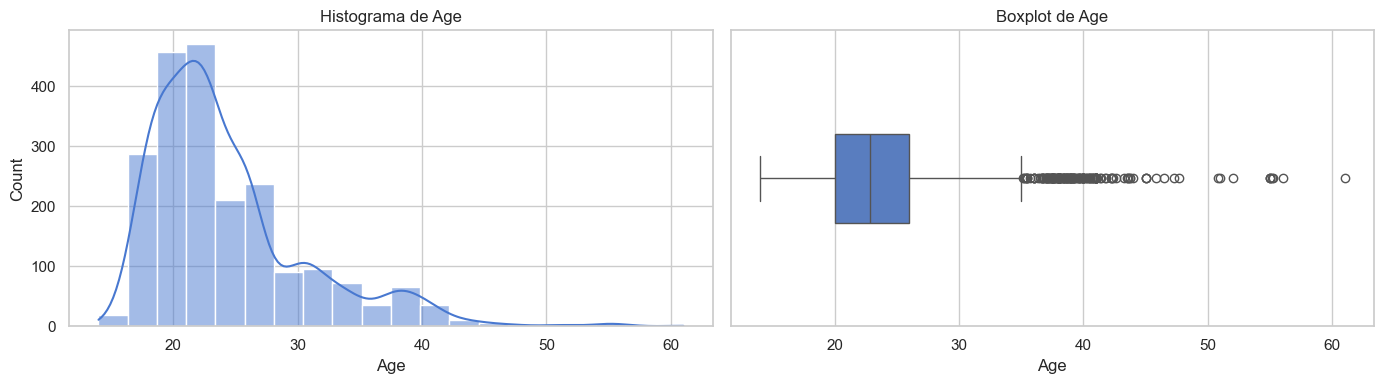

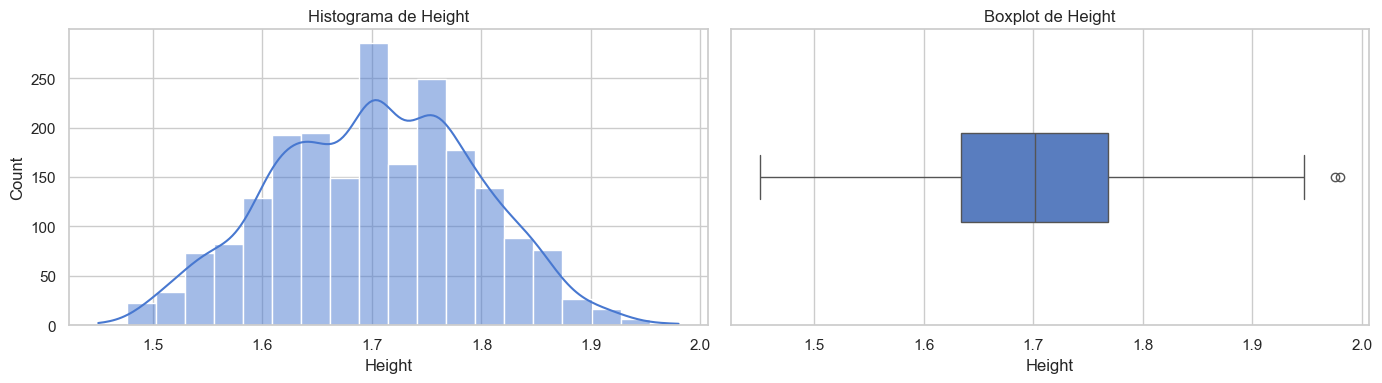

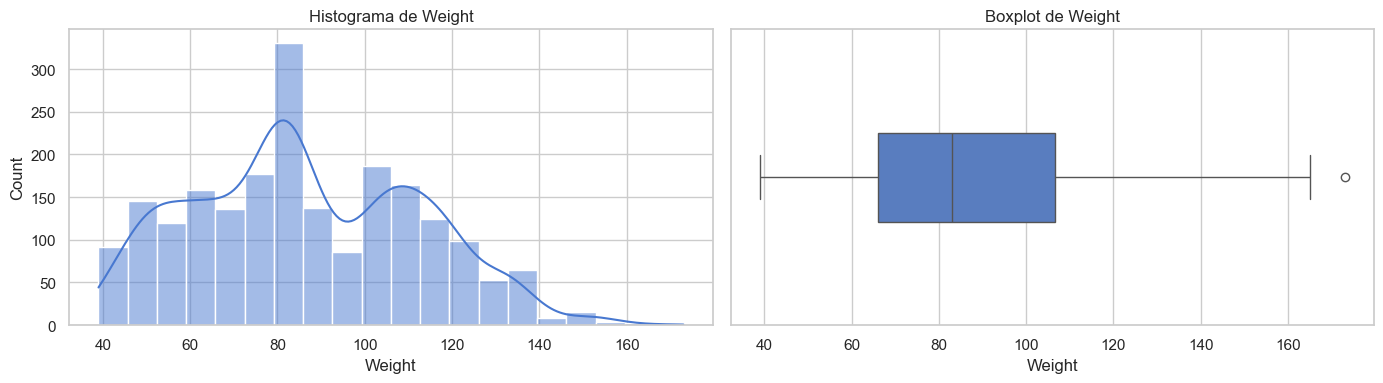

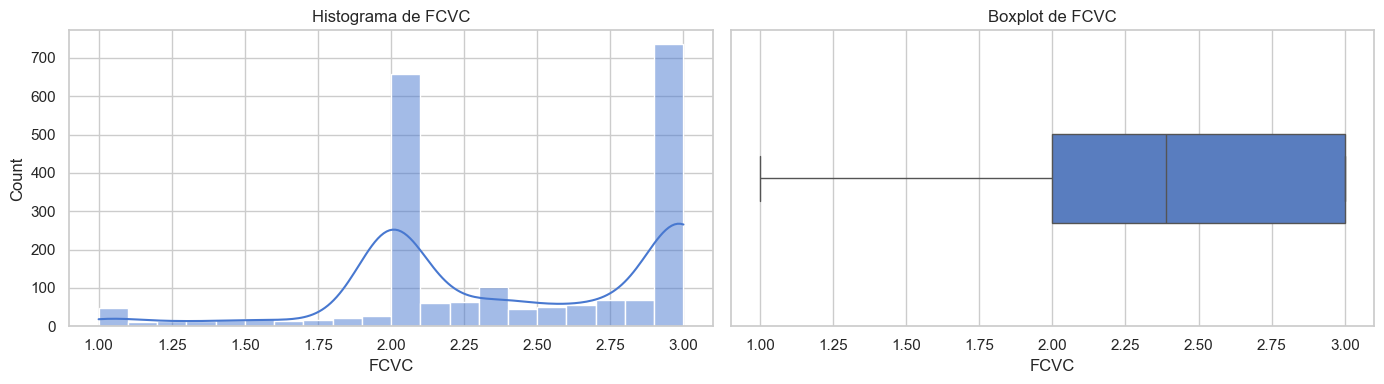

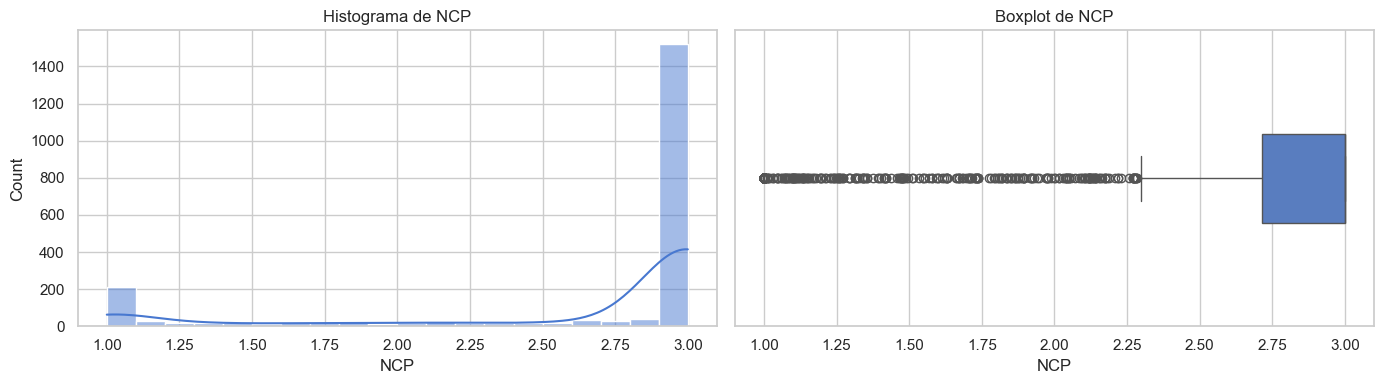

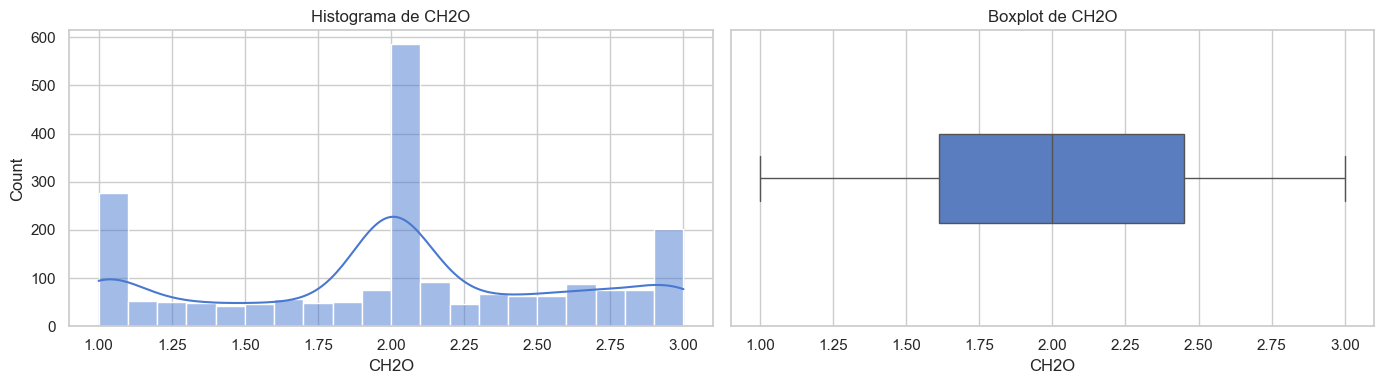

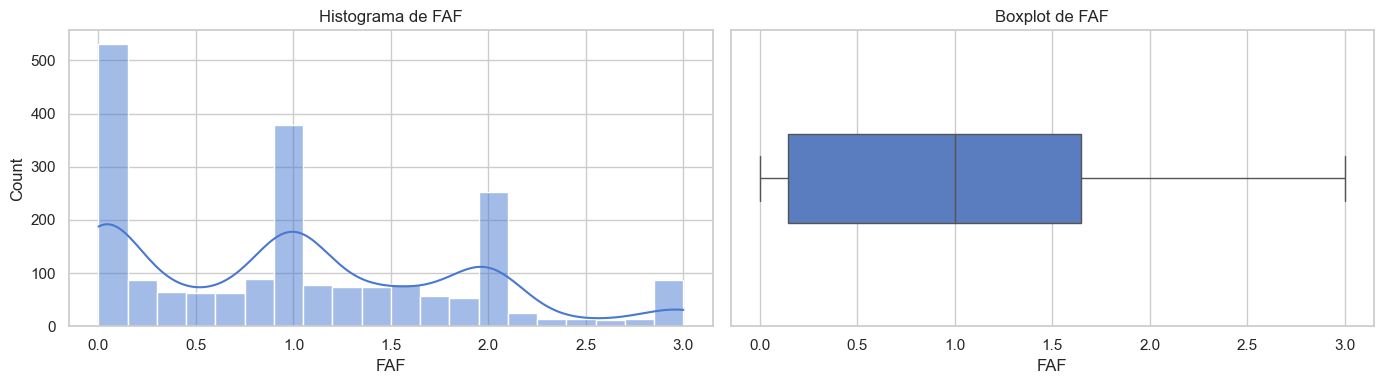

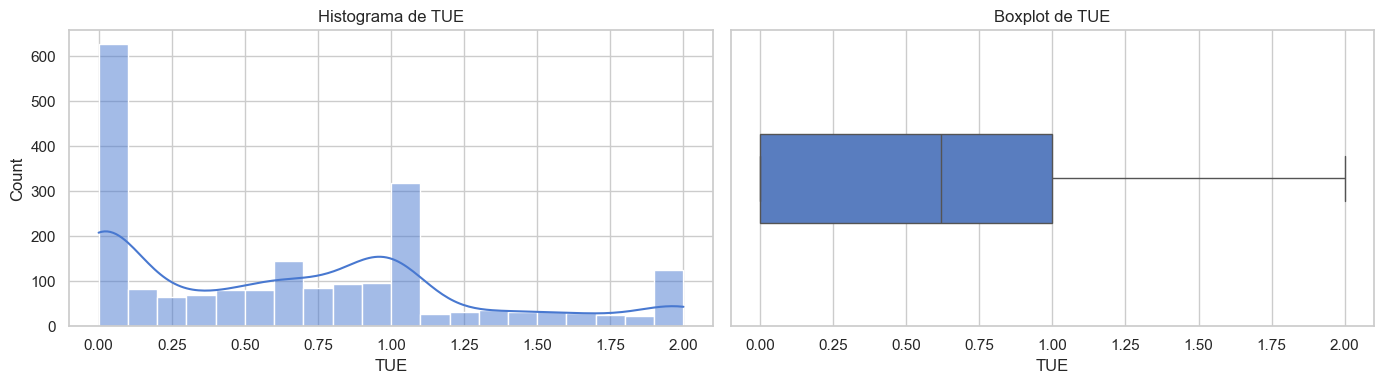

In [6]:
# --- Visualización de las columnas numéricas --- #

for col in numeric_cols:
    plt.figure(figsize=(14,4))
    
    # Histograma
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Histograma de {col}')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], width=0.3)
    plt.title(f'Boxplot de {col}')
    
    plt.tight_layout()
    plt.show()

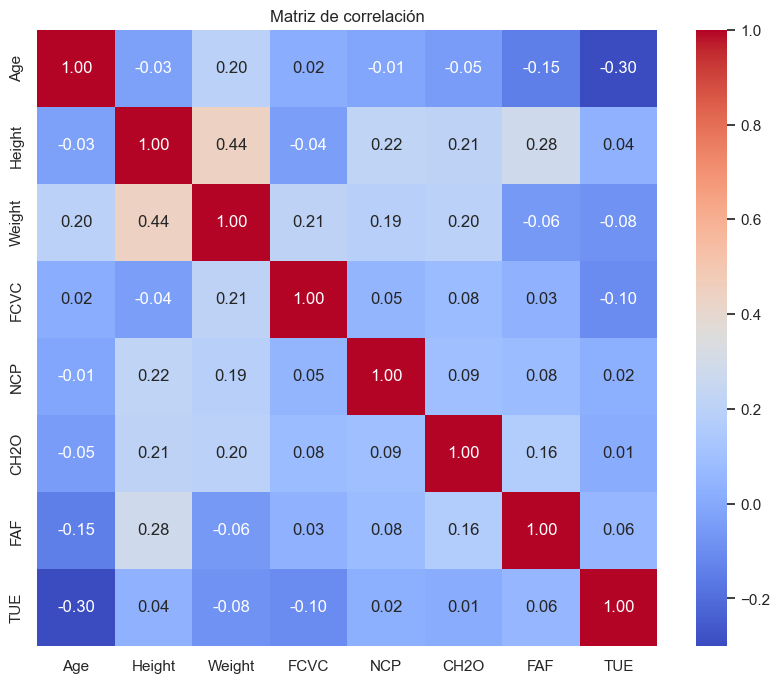

In [7]:
# --- Heatmap de columnas numéricas --- #

plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

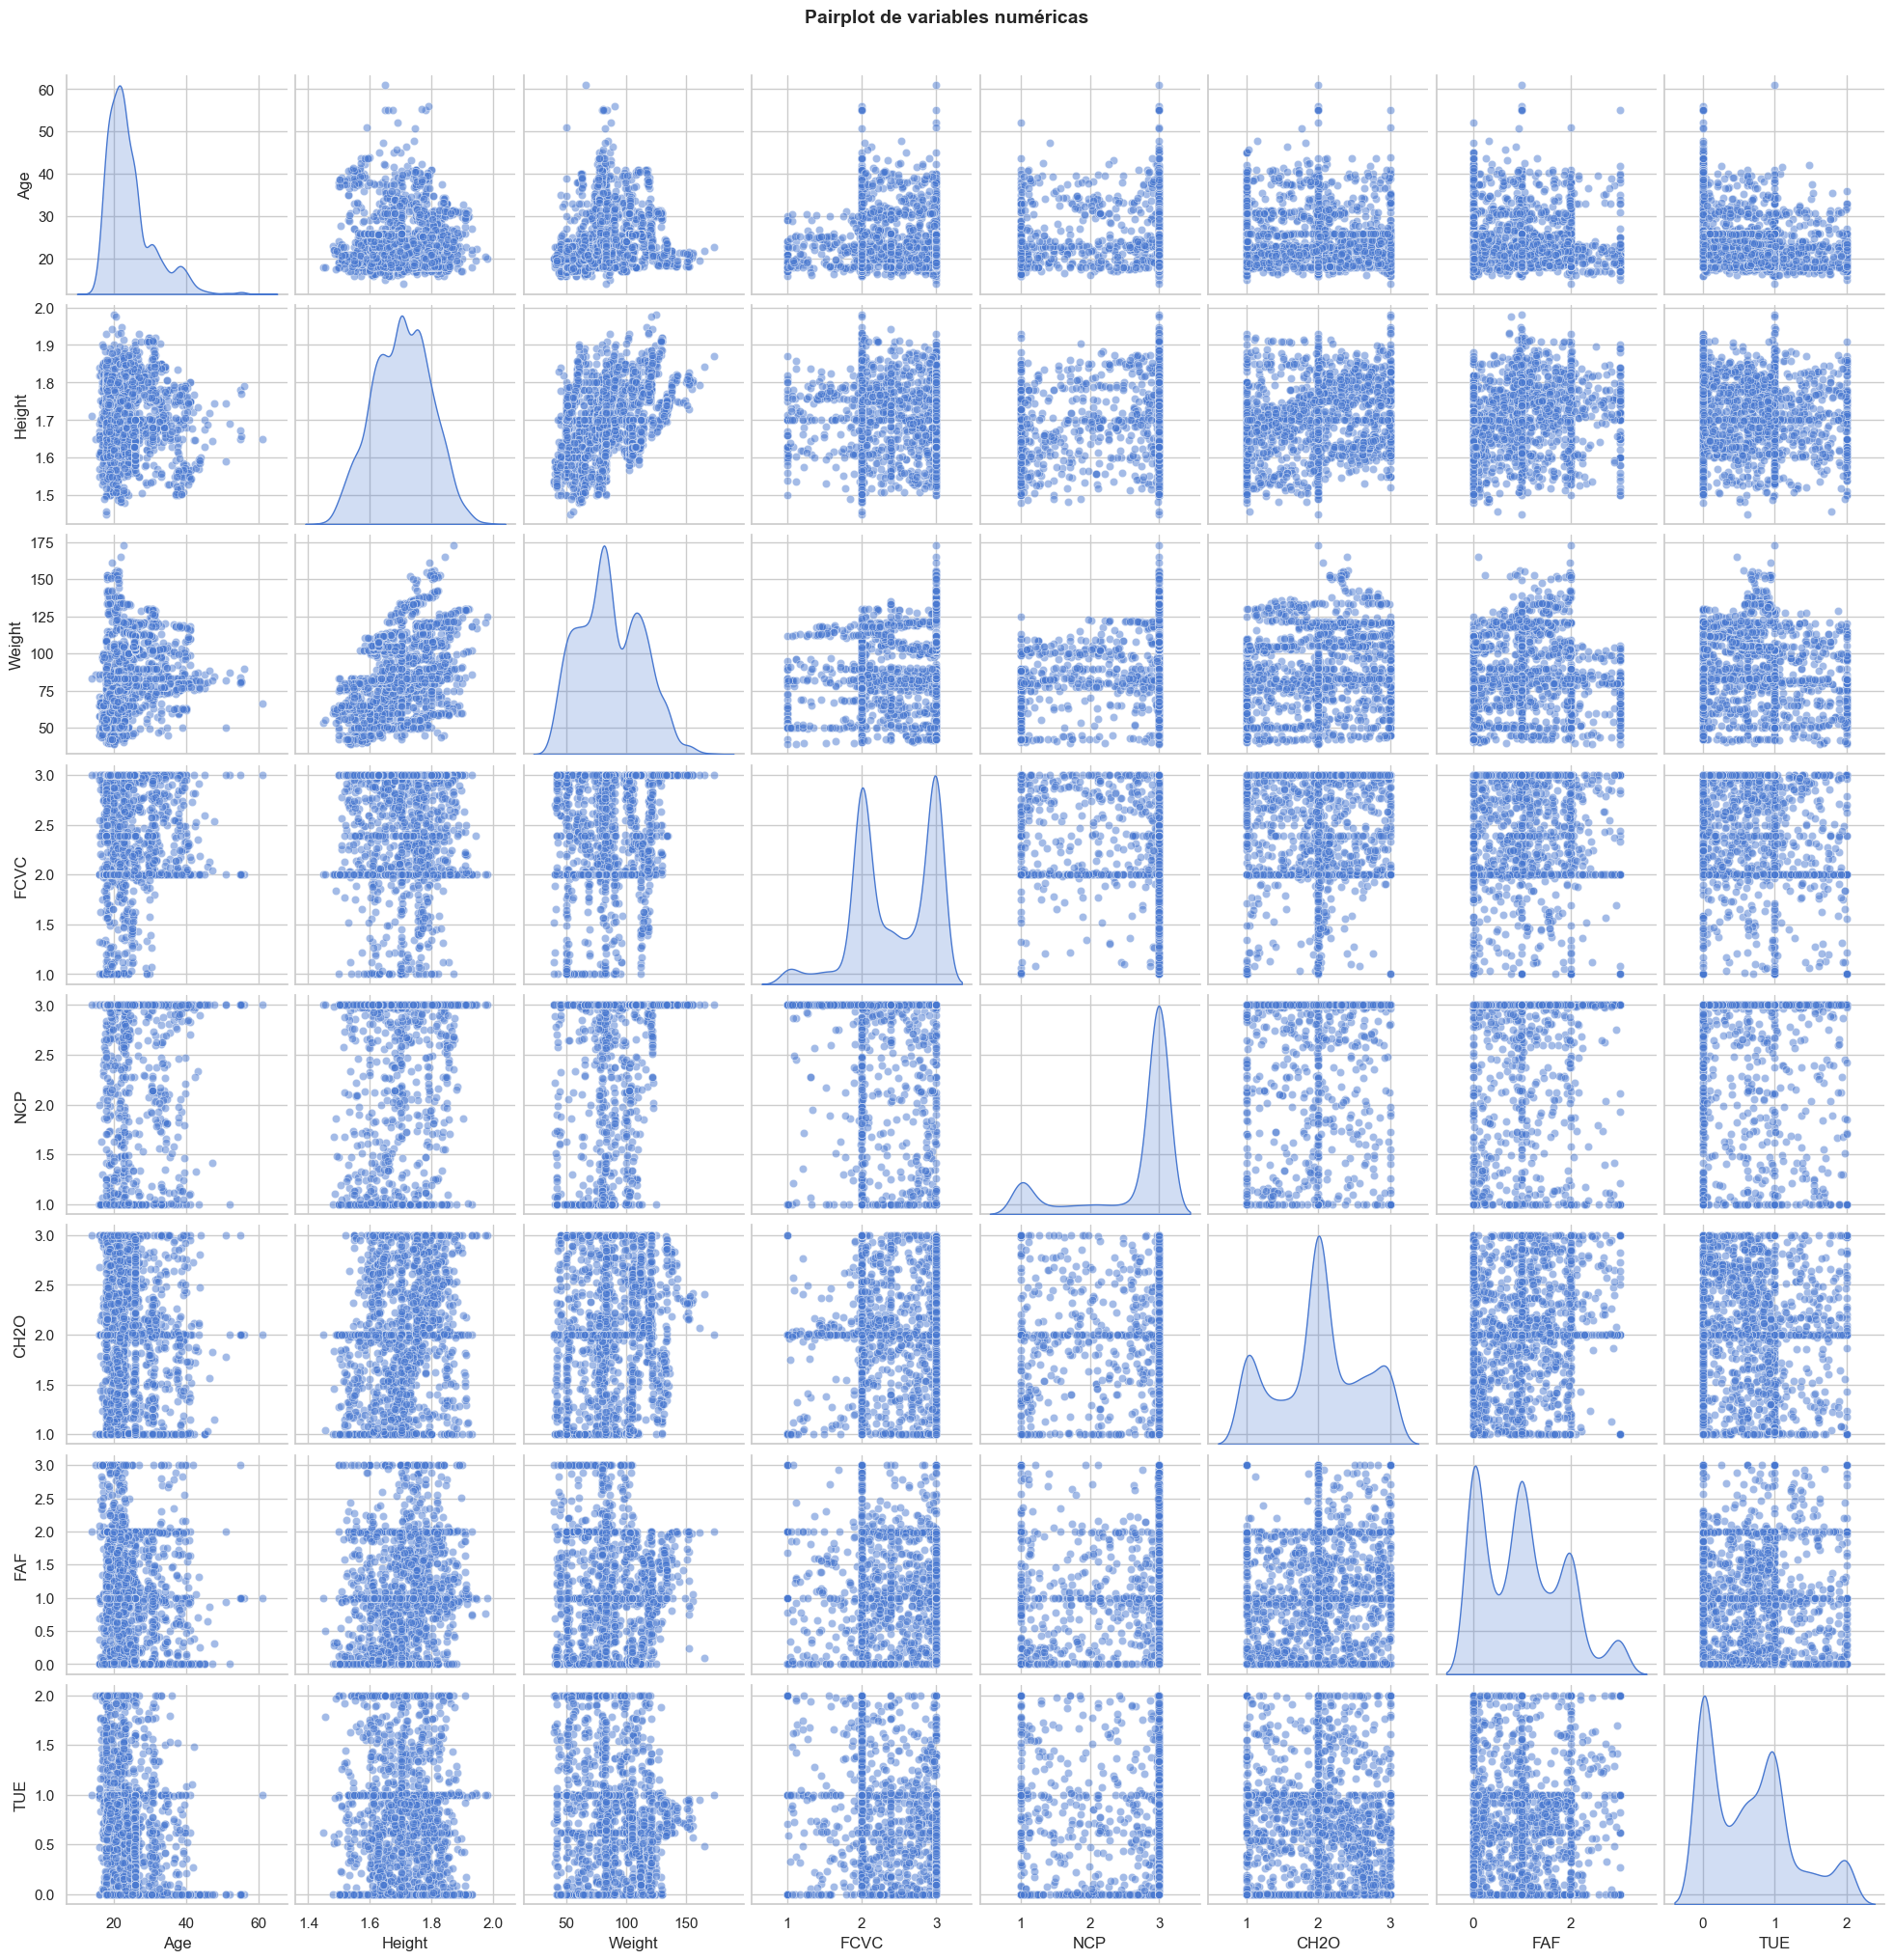

In [8]:
# --- Pairplot de columnas numéricas --- #

sns.pairplot(df[numeric_cols], diag_kind="kde", plot_kws={"alpha":0.5})
plt.suptitle("Pairplot de variables numéricas", y=1.02, fontsize=14, fontweight="bold")
plt.show()

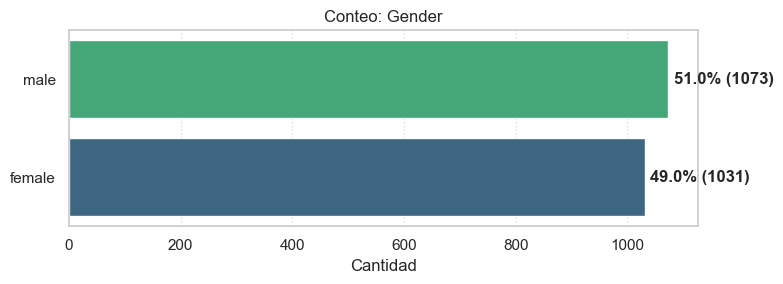

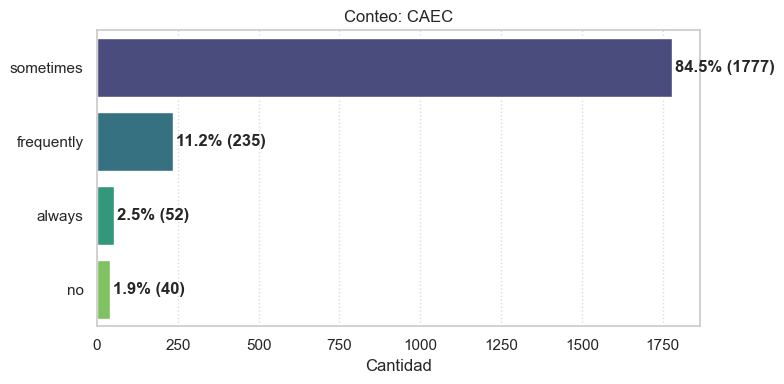

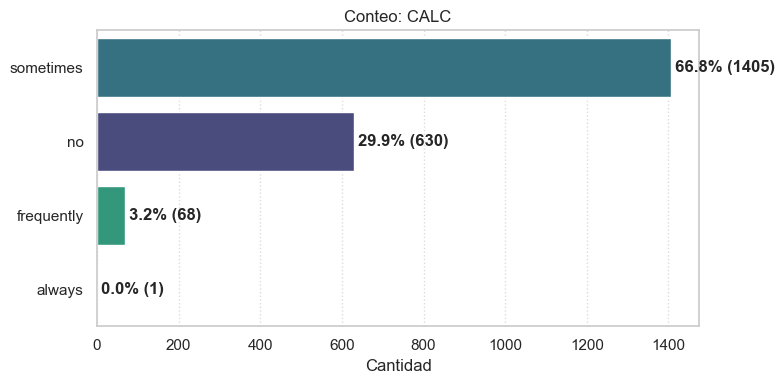

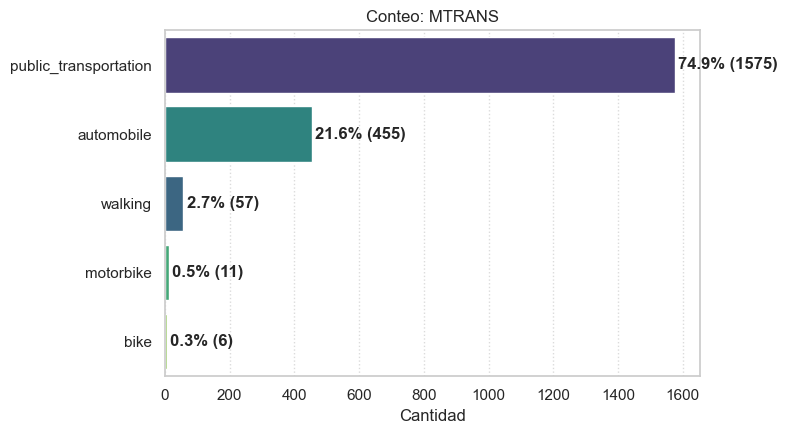

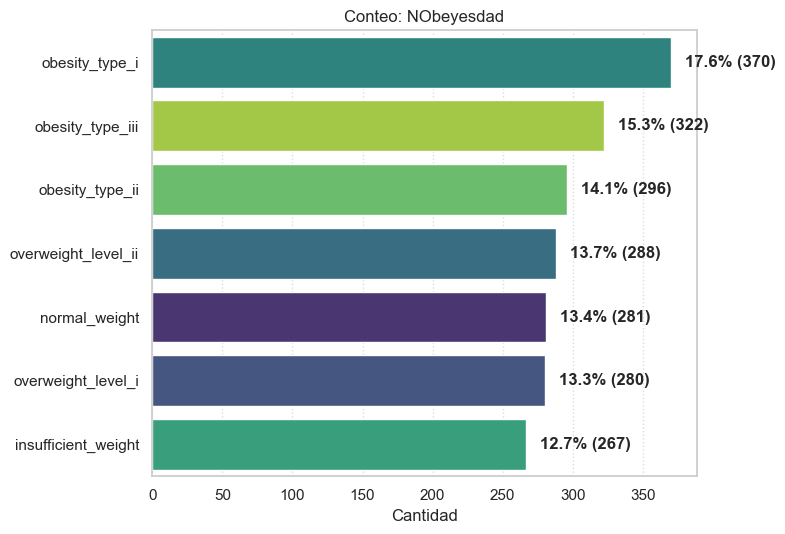

In [9]:
# --- Visualización de las columnas de texto --- #

for col in object_cols:
    categorias = df[col].value_counts()
    n_cats = len(categorias)
    
    # Ajustar altura dinámicamente
    plt.figure(figsize=(8, 2 + n_cats*0.5))
    
    ax = sns.countplot(
        y=df[col], 
        order=categorias.index,
        palette="viridis",
        hue=df[col]
    )
    
    # Título y ejes
    plt.title(f'Conteo: {col}')
    plt.xlabel('Cantidad')
    plt.ylabel('')
    
    # Hacer líneas verticales punteadas
    ax.grid(axis='x', linestyle=':', alpha=0.7)
    
    # Calcular etiquetas: conteo + porcentaje
    total = len(df)
    for p in ax.patches:
        count = int(p.get_width())
        percent = 100 * count / total
        ax.text(
            p.get_width() + 10,
            p.get_y() + p.get_height()/2, 
            f'{percent:.1f}% ({count})',
            va='center',
            fontweight='bold'        # texto en negritas
        )
    
    plt.tight_layout()
    plt.show()

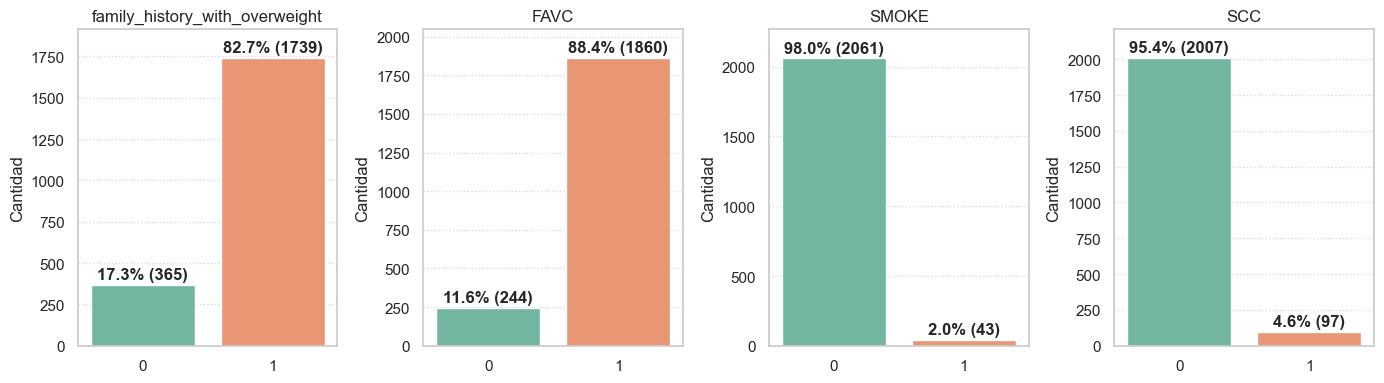

In [10]:
# --- Visualización de las columnas binarias --- #

fig, axes = plt.subplots(1, len(binary_cols), figsize=(14, 4))
total = len(df)

for ax, col in zip(axes, binary_cols):
    sns.countplot(
        x=df[col],
        ax=ax,
        palette="Set2",
        hue=df[col],
        legend=False,
        order=[0,1]
    )
    
    ax.set_title(f'{col}')
    ax.set_xlabel("")
    ax.set_ylabel("Cantidad")
    ax.grid(axis='y', linestyle=':', alpha=0.7)

    # Ajustar límite superior para espacio extra
    max_count = df[col].value_counts().max()
    ax.set_ylim(0, max_count * 1.10)
    
    # Agregar etiquetas de conteo + porcentaje
    for p in ax.patches:
        count = int(p.get_height())
        percent = 100 * count / total
        ax.text(
            p.get_x() + p.get_width()/2,
            p.get_height() + 40,
            f'{percent:.1f}% ({count})',
            ha='center',
            fontweight='bold'
        )

plt.tight_layout()
plt.show()


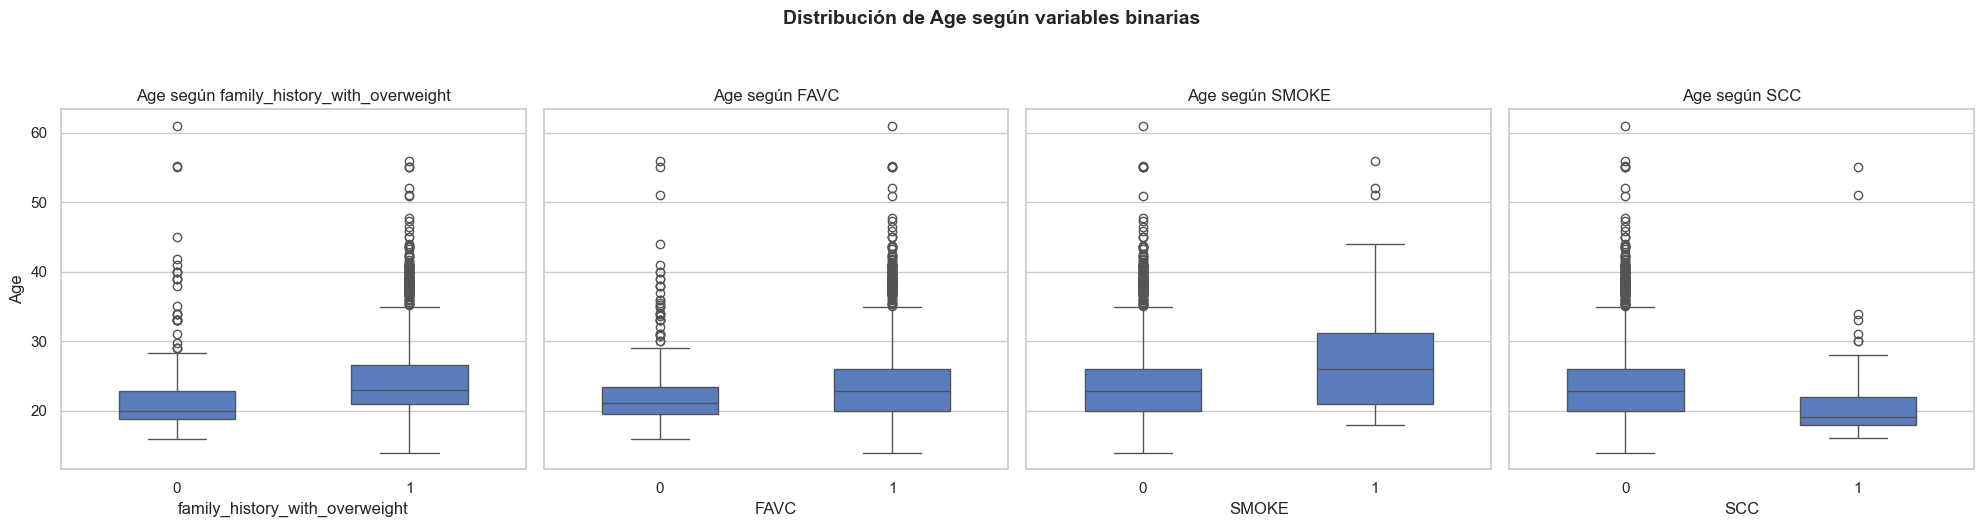

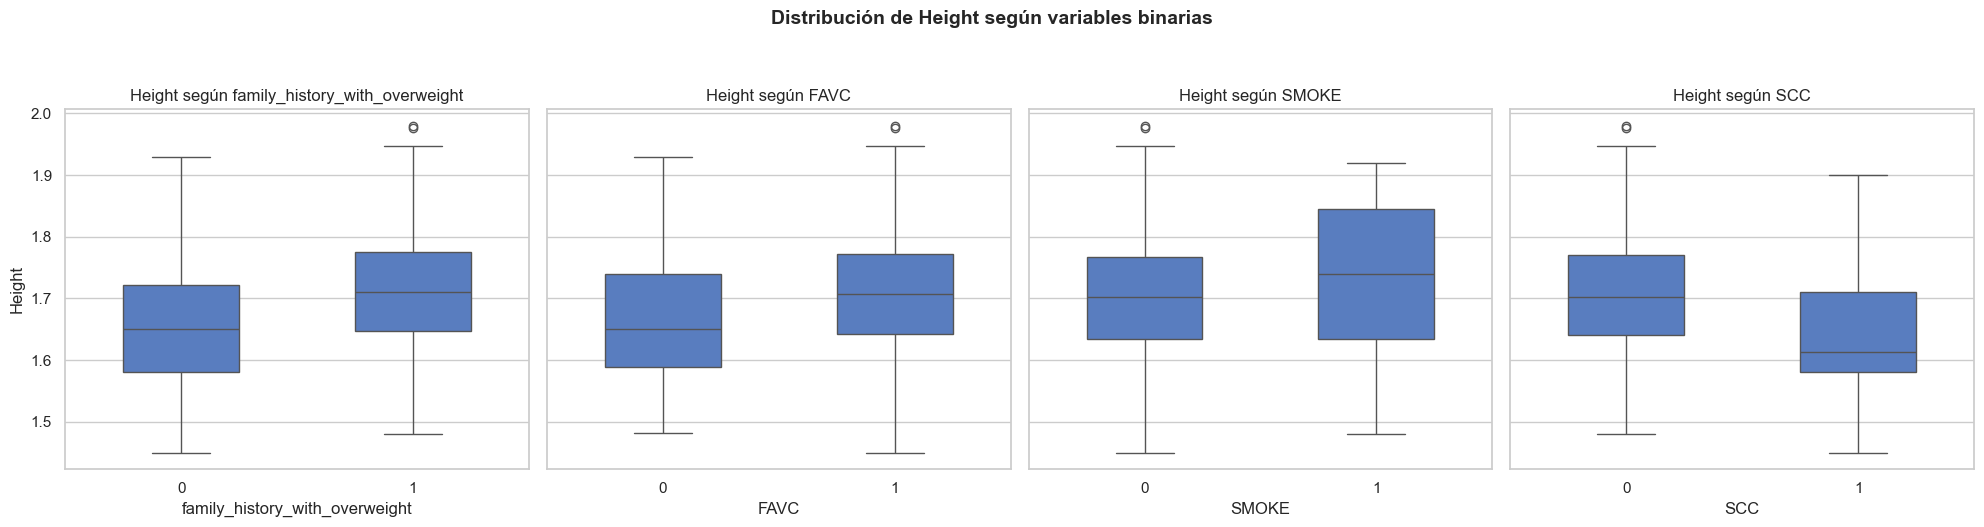

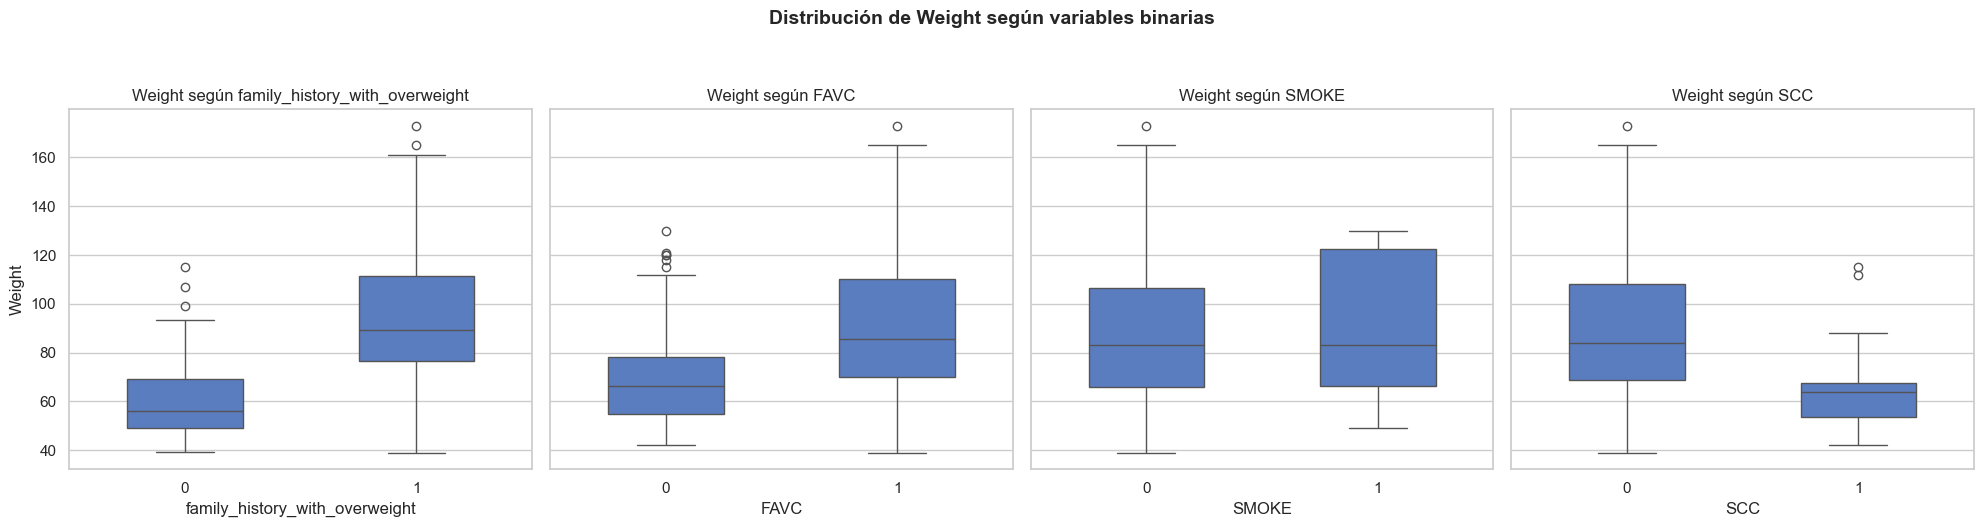

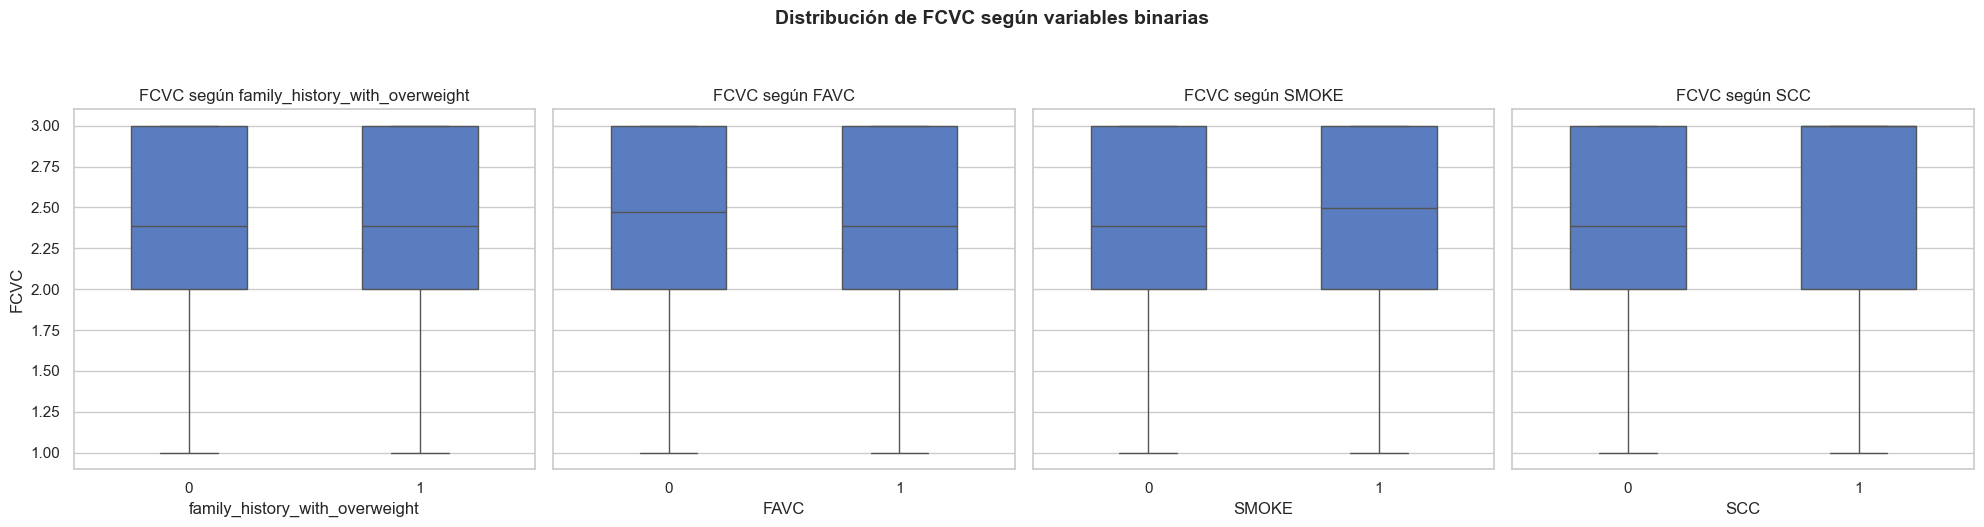

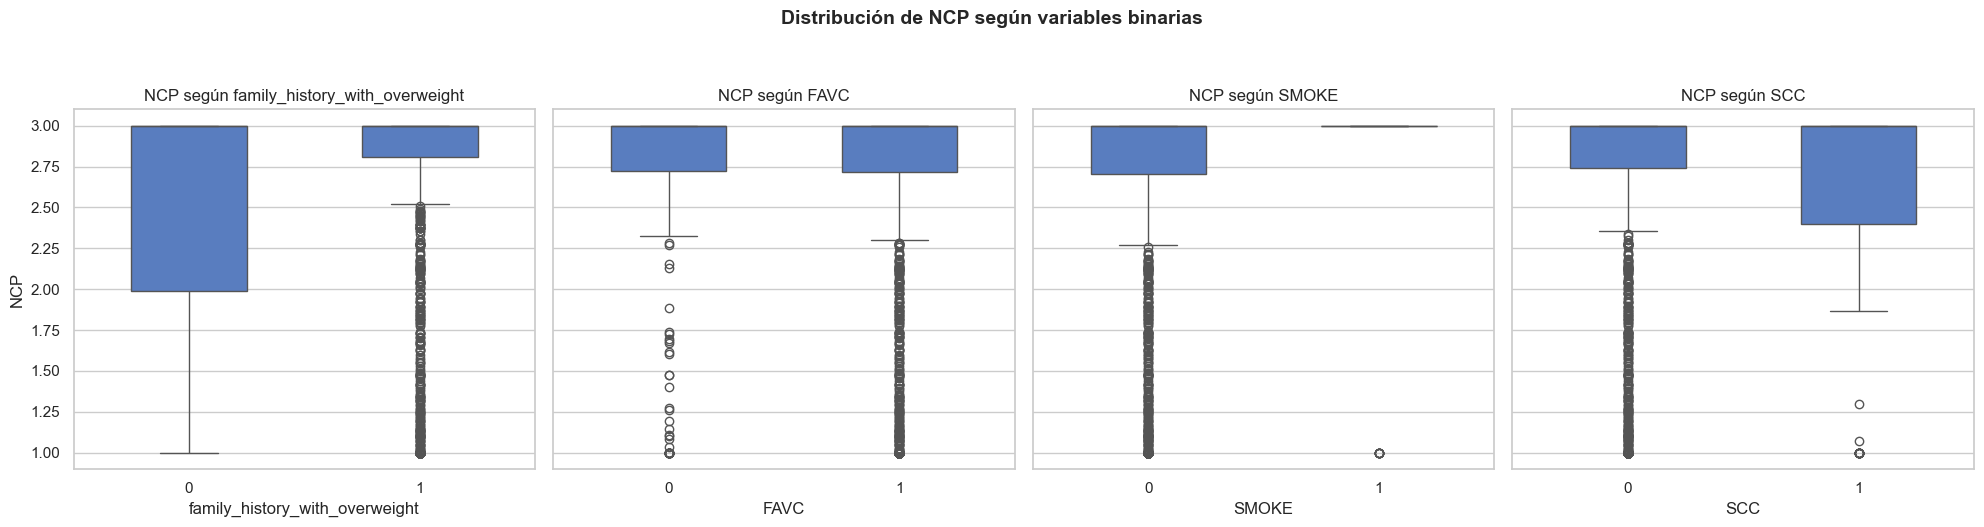

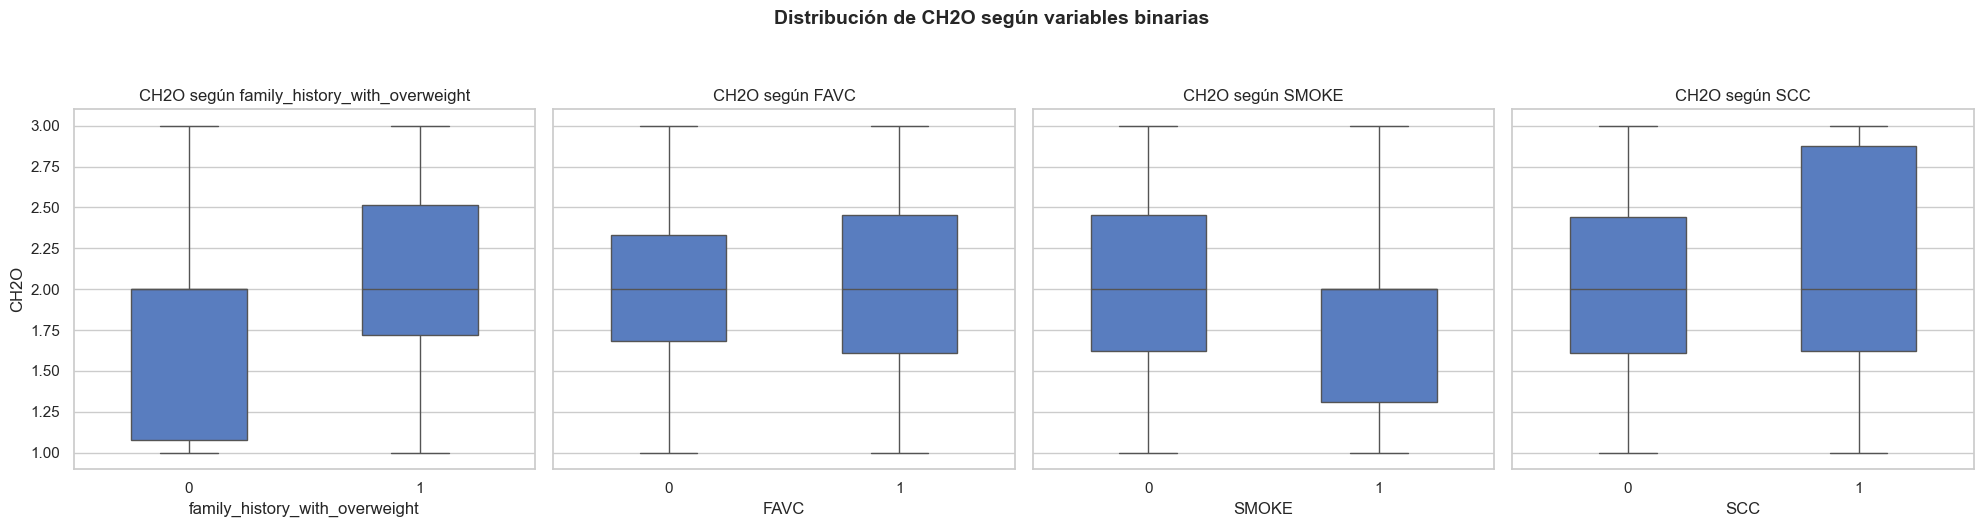

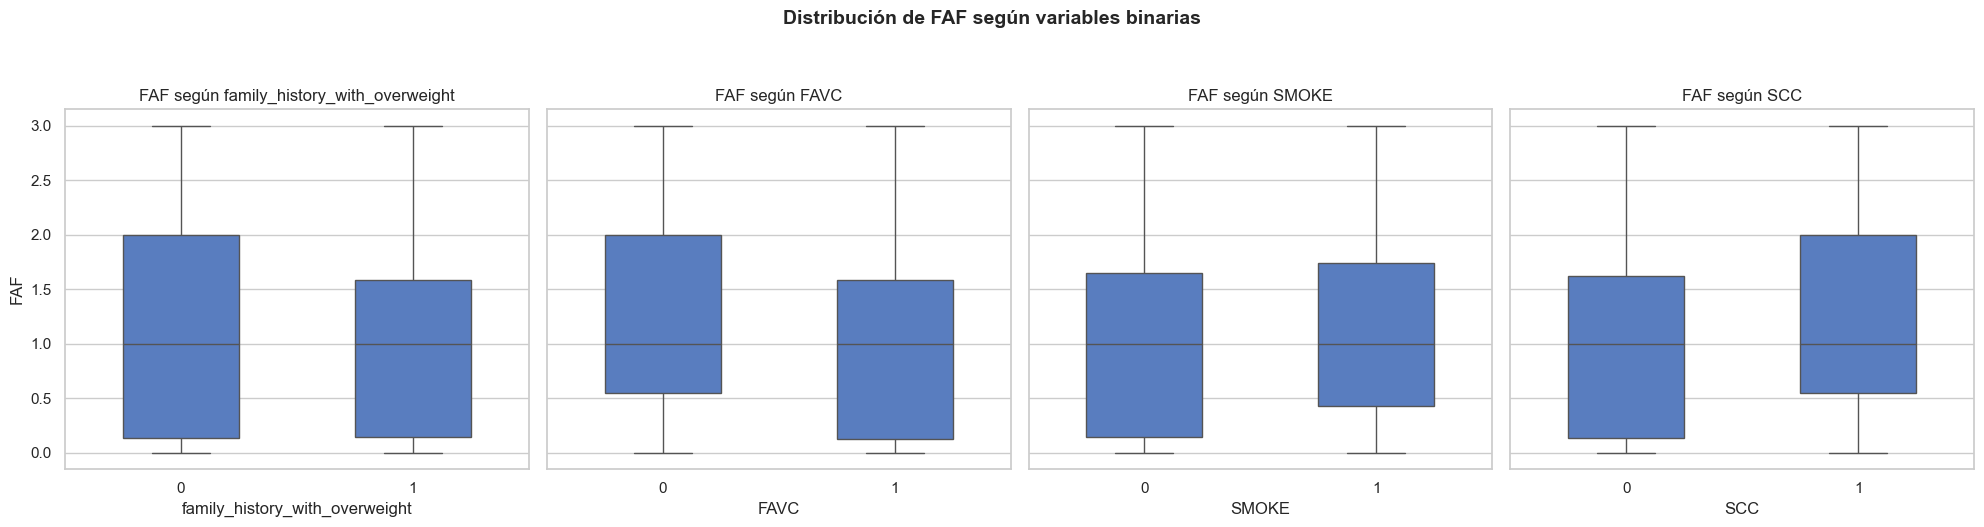

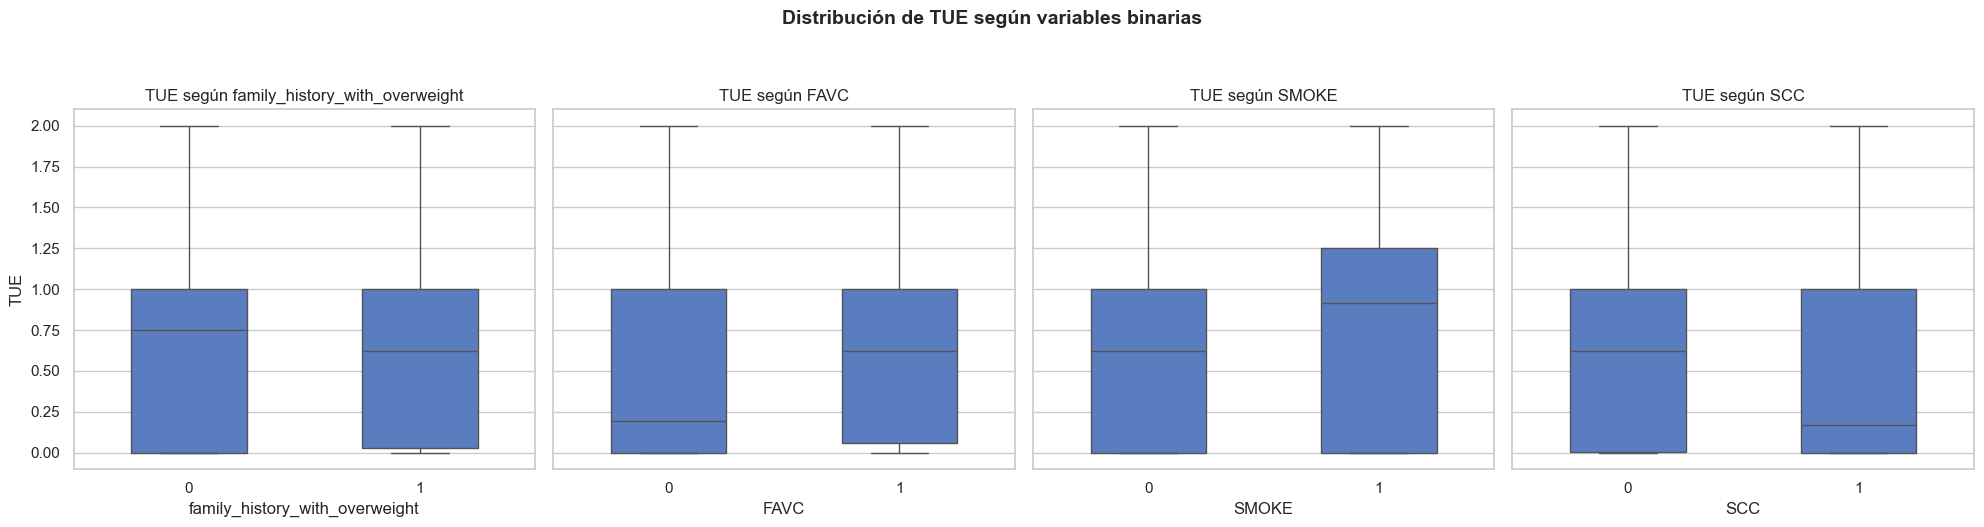

In [11]:
# --- Buscando correlación entre las variables numéricas y las binarias --- #

# Número de binarias y numéricas
n_bin = len(binary_cols)
n_num = len(numeric_cols)

for num_col in numeric_cols:
    fig, axes = plt.subplots(1, n_bin, figsize=(5*n_bin, 5), sharey=True)
    
    for i, bin_col in enumerate(binary_cols):
        sns.boxplot(x=df[bin_col], y=df[num_col], ax=axes[i], width=0.5)
        axes[i].set_title(f'{num_col} según {bin_col}')
        axes[i].set_xlabel(bin_col)
        if i == 0:  # solo el primero muestra etiqueta Y
            axes[i].set_ylabel(num_col)
        else:
            axes[i].set_ylabel("")
    
    plt.suptitle(f"Distribución de {num_col} según variables binarias", 
                 fontsize=14, fontweight="bold", y=1.05)
    plt.tight_layout()
    plt.show()


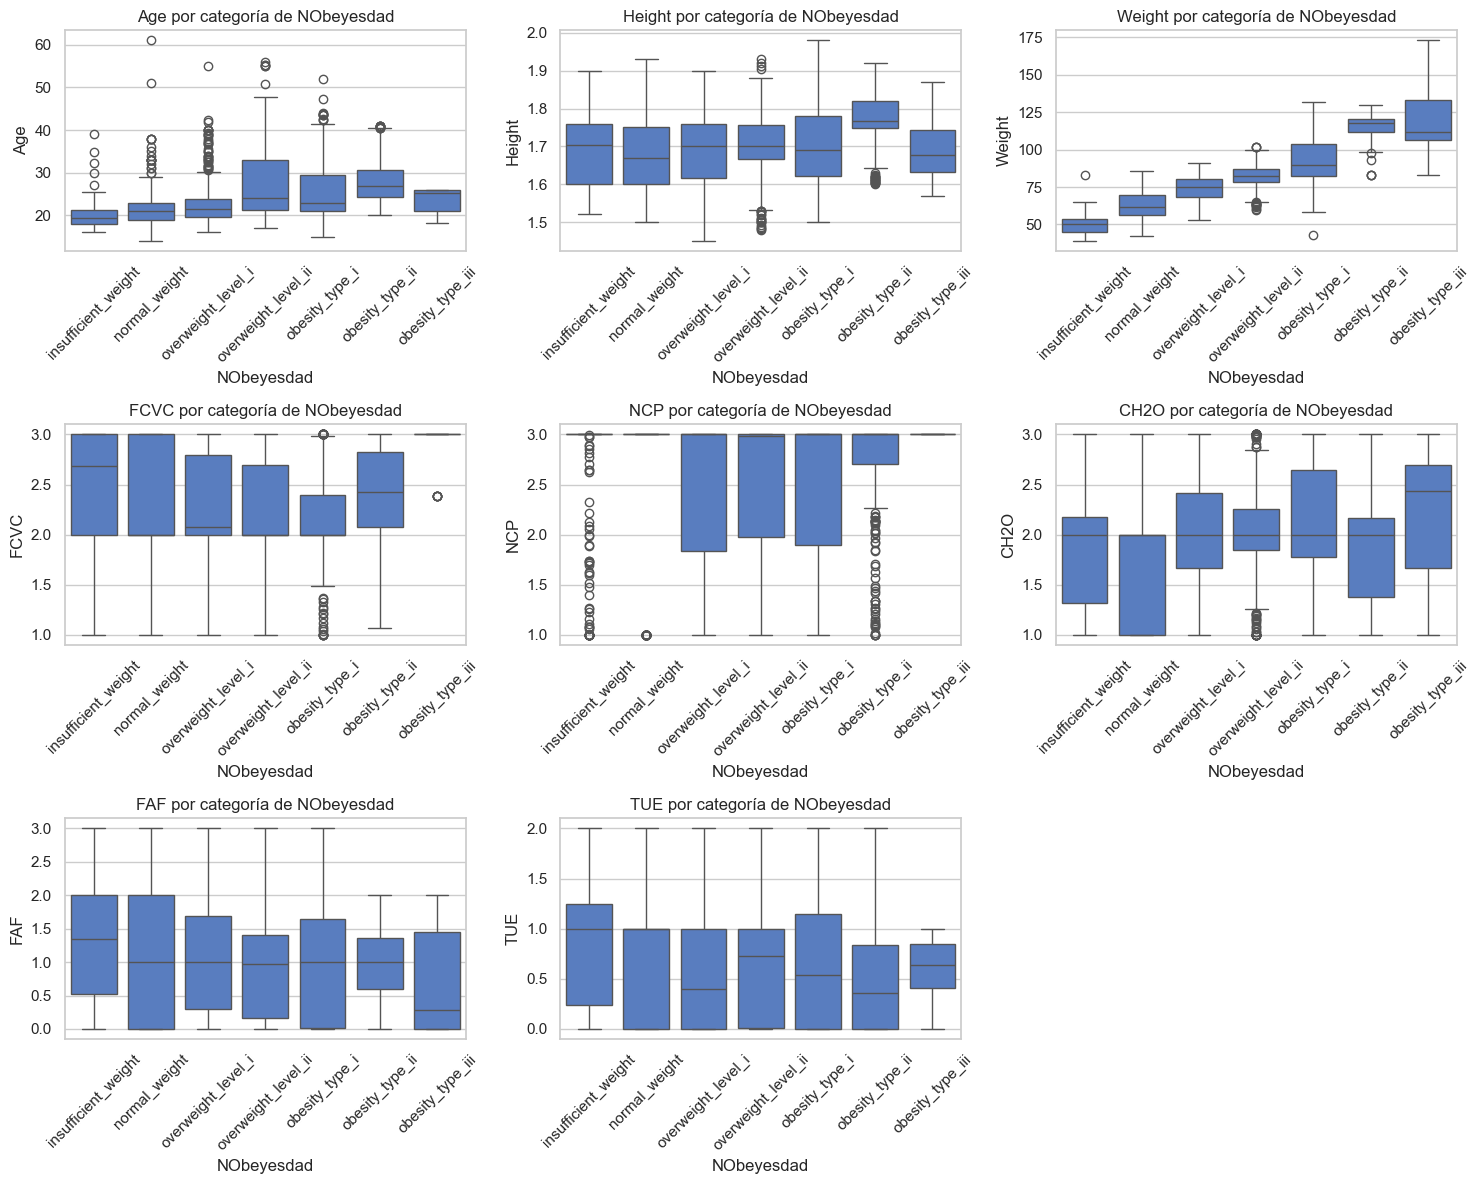

<Figure size 500x400 with 0 Axes>

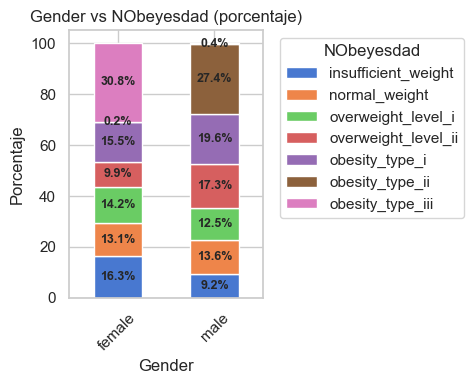

<Figure size 900x400 with 0 Axes>

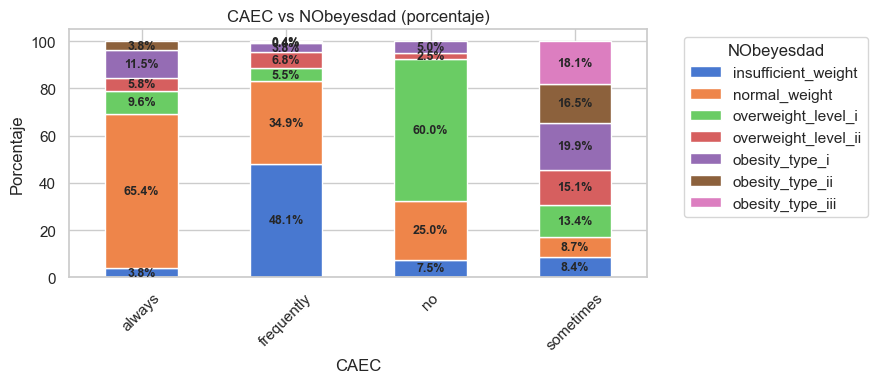

<Figure size 900x400 with 0 Axes>

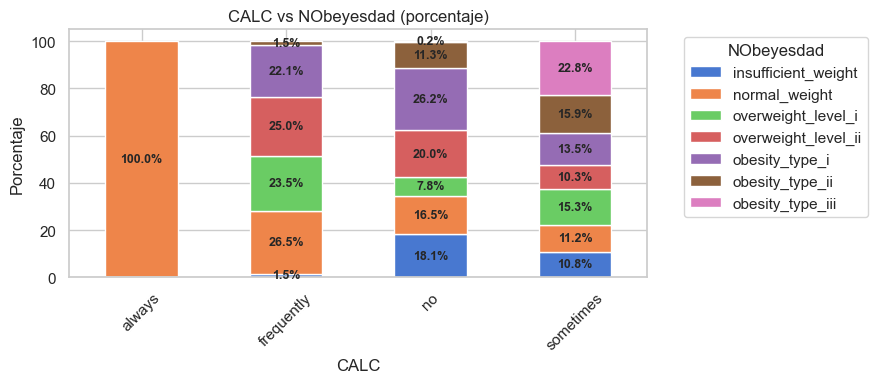

<Figure size 1100x400 with 0 Axes>

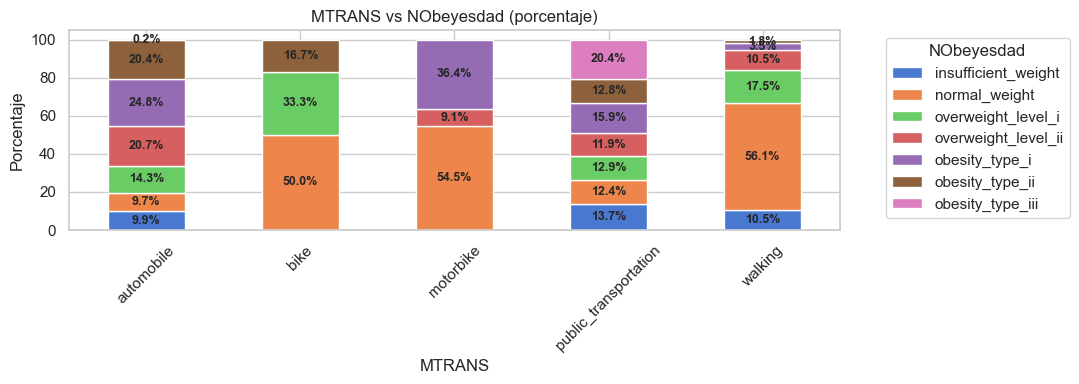

In [12]:
# --- Buscando correlación entre las variables numéricas y categóricas con la variable objetivo --- #

# Definir orden lógico de la variable objetivo
ordered_classes = [
    'insufficient_weight',
    'normal_weight',
    'overweight_level_i',
    'overweight_level_ii',
    'obesity_type_i',
    'obesity_type_ii',
    'obesity_type_iii'
]

# Convertir NObeyesdad a categoría ordenada
cat_type = CategoricalDtype(categories=ordered_classes, ordered=True)
df['NObeyesdad'] = df['NObeyesdad'].astype(cat_type)

# Boxplots para columnas numéricas
n_num = len(numeric_cols)
n_cols = 3
n_rows = (n_num + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x='NObeyesdad', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} por categoría de NObeyesdad')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Gráficas de barras apiladas para variables categóricas
for col in object_cols_no_target:
    n_categories = df[col].nunique()
    fig_width = (max(2, min(n_categories, 5)) * 2) + 1
    plt.figure(figsize=(fig_width, 4))
    
    ct = pd.crosstab(df[col], df['NObeyesdad'])
    ct = ct[ordered_classes]
    ct_perc = ct.div(ct.sum(axis=1), axis=0) * 100

    ax = ct_perc.plot(kind='bar', stacked=True, figsize=(fig_width,4))
    plt.title(f'{col} vs NObeyesdad (porcentaje)')
    plt.ylabel('Porcentaje')
    plt.xticks(rotation=45)
    
    # Mostrar % sobre cada segmento
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.text(x + width/2, y + height/2,
                    f'{height:.1f}%', ha='center', va='center', fontsize=9, fontweight='bold')
    
    # Mover la leyenda fuera del área de la gráfica
    ax.legend(title='NObeyesdad', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()